In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# data handling

In [2]:
df=pd.read_excel('/content/fraud dataset.xls')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(df.shape)
print("first five lines of data")
df.head(5)
print("describe:")
print(df.describe())
print("info:")
print(df.info())

(16383, 31)
first five lines of data
describe:
               Time            V1            V2            V3            V4  \
count  16383.000000  16383.000000  16383.000000  16383.000000  16383.000000   
mean   12542.814625     -0.252056      0.273186      0.799186      0.301382   
std     9209.637034      1.847886      1.490092      1.706925      1.489992   
min        0.000000    -28.344757    -40.978852    -27.747084     -5.172595   
25%     3739.000000     -0.968422     -0.288962      0.363496     -0.623064   
50%    11047.000000     -0.317611      0.244743      0.936342      0.233961   
75%    21467.500000      1.161927      0.882922      1.569152      1.179955   
max    27762.000000      1.960497     14.845545      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  16383.000000  16383.000000  16383.000000  16383.000000  16383.000000   
mean      -0.132543      0.111352     -0.148572      0.003608      0.829034   
std 

check class variable

class as a pie chart:


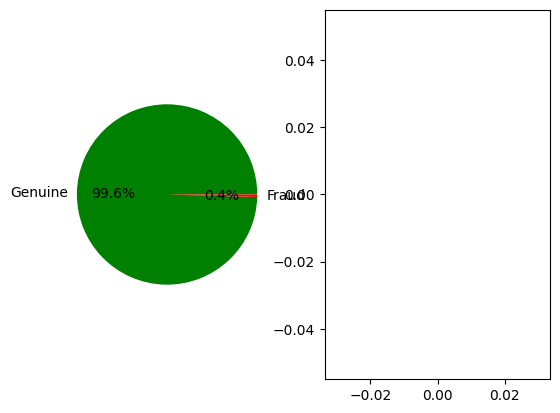

In [ ]:
from enum import auto
from enum import auto
import matplotlib.pyplot as plt
print("class as a pie chart:")
fig,ax=plt.subplots(1,2)
ax[0].pie(df.Class.value_counts(),autopct='%1.1f%%',labels=['Genuine','Fraud'],colors=['g','r']) #added [0] and removed extra comma
plt.axis('equal')
plt.ylabel('')
plt.show() #added plt.show() to display the plot


#Plot time to see if there is any trend

time variable
16378    7.710278
16379    7.710833
16380    7.711111
16381    7.711111
16382    7.711667
Name: Time_Hrs, dtype: float64


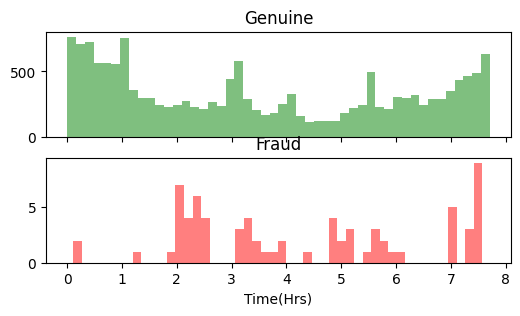

In [ ]:

print("time variable")
df["Time_Hrs"]=df["Time"]/3600
print(df["Time_Hrs"].tail(5))
import matplotlib.pyplot as plt
fig,(ax1,ax2) =plt.subplots(2,1,sharex=True,figsize=(6,3))
ax1.hist(df.Time_Hrs[df.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.Time_Hrs[df.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time(Hrs)')
plt.show()





In [ ]:
df=df.drop(['Time'],axis=1)

lets check another feature amount

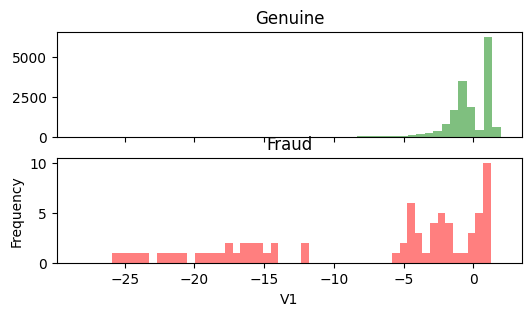

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 3))
ax1.hist(df.V1[df.Class == 0], bins=50, color='g', alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.V1[df.Class == 1], bins=50, color='r', alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('V1')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
df['Amount']=StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Amount'],axis=1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Time_Hrs
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.000278
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.000278
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.000556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,-1.166678,0.437750,1.382356,-0.035826,0.005683,-0.329978,0.528288,0.239285,-0.319395,0.130352,...,-0.162455,-0.452527,0.185690,0.177385,-0.264801,0.080201,0.368109,0.243882,0,7.710278
16379,1.005332,0.008020,0.046815,1.337482,-0.222729,-0.820115,0.537881,-0.324359,-0.031909,-0.144677,...,0.050906,0.075592,-0.270166,0.440799,0.831481,-0.292945,-0.006978,0.037215,0,7.710833
16380,1.210581,-0.456955,-0.595865,-2.208655,-0.379938,-1.331917,0.321185,-0.317827,1.254643,-1.342589,...,0.070519,0.216408,-0.283914,0.058097,0.897804,-0.745964,0.024421,0.012444,0,7.711111
16381,1.278037,0.459688,-0.126742,1.111696,-0.014673,-1.205858,0.510280,-0.320932,-0.186976,0.063516,...,-0.004676,0.016583,-0.138101,0.384401,0.833121,-0.294031,-0.011770,0.009507,0,7.711111


now its time to split data into intest set(20%)and tranning set (80%) i will define a function for it

In [22]:
def split_data(df,drop_list):
  df=df.drop(drop_list,axis=1)
  print(df.columns)
  #train splits time
  from sklearn.model_selection import train_test_split
  y=df['class'].values#target
  x=df.drop(['class'],axis=1).values#features
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
  print("fraud cases in test-set size:",sum(y_test))
  return x_train,x_test,y_train,y_test


In [23]:
def get_prediction(clf, x_train, y_train, x_test):

  # Fit the classifier to the training data
  clf.fit(x_train, y_train)

  # Predict using test data
  y_pred = clf.predict(x_test)

  # Compute predicted probabilities
  y_pred_prob = clf.predict_proba(x_test)

  # For fun: train-set predictions
  from sklearn.metrics import confusion_matrix # Import confusion_matrix here
  train_pred = clf.predict(x_train)
  print('train-set confusion matrix:\n', confusion_matrix(y_train, train_pred))

  return y_pred, y_pred_prob



In [25]:

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


In [29]:
def print_scores(y_test,y_pred,y_pred_prob):
  from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report, recall_score, precision_score, f1_score
  # Import necessary functions here to make them available within the function
  print('test-set confusion matrix:\n',confusion_matrix(y_test,y_pred))
  print('accuracy score:',accuracy_score(y_test,y_pred))
  print('AUC score:',roc_auc_score(y_test,y_pred_prob[:,1]))
  print('classification report:\n',classification_report(y_test,y_pred))
  print('recall score:',recall_score(y_test,y_pred))
  print('precision score:',precision_score(y_test,y_pred))
  print('f1 score:',f1_score(y_test,y_pred))

# Task
How can I create a plot in Colab?

Here is all the data you need:
"fraud dataset.xls"

## Data loading

### Subtask:
Load the "fraud dataset.xls" file into a pandas DataFrame.


**Reasoning**:
Load the "fraud dataset.xls" file into a pandas DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_excel('fraud dataset.xls', sheet_name='Sheet1')
    display(df.head())
except FileNotFoundError:
    print("Error: 'fraud dataset.xls' not found. Please check the file path.")
    df = None
except ValueError as e:
    print(f"Error reading Excel file: {e}")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

Error reading Excel file: Worksheet named 'Sheet1' not found


**Reasoning**:
The previous attempt failed because the sheet name 'Sheet1' was incorrect.  I will try to read the excel file again, but this time I'll try to get the sheet names first and then read a valid sheet.



In [2]:
import pandas as pd

try:
    excel_file = pd.ExcelFile('fraud dataset.xls')
    sheet_names = excel_file.sheet_names
    if sheet_names:
        print(f"Available sheet names: {sheet_names}")
        # Assuming the first sheet is the one we want
        df = pd.read_excel('fraud dataset.xls', sheet_name=sheet_names[0])
        display(df.head())
    else:
        print("Error: No sheets found in the Excel file.")
        df = None
except FileNotFoundError:
    print("Error: 'fraud dataset.xls' not found. Please check the file path.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

Available sheet names: ['creditcard']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data exploration

### Subtask:
Explore the loaded data to understand its structure and identify suitable columns for visualization.


**Reasoning**:
Examine the shape, info, and descriptive statistics of the DataFrame to understand its structure and identify suitable columns for visualization.



In [3]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
display(df.describe())

# Check for unique values in the 'Class' column
print("\nUnique values in 'Class' column:")
print(df['Class'].unique())
print("\nValue counts for 'Class' column:")
print(df['Class'].value_counts())

# Identify suitable columns for visualization
# We can choose 'Amount' and 'Time' as numerical columns and 'Class' as the categorical column
suitable_numerical_cols = ['Amount', 'Time']
suitable_categorical_col = 'Class'
print(f"\nSuitable numerical columns for visualization: {suitable_numerical_cols}")
print(f"Suitable categorical column for visualization: {suitable_categorical_col}")

Shape of the DataFrame: (16383, 31)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    16383 non-null  int64  
 1   V1      16383 non-null  float64
 2   V2      16383 non-null  float64
 3   V3      16383 non-null  float64
 4   V4      16383 non-null  float64
 5   V5      16383 non-null  float64
 6   V6      16383 non-null  float64
 7   V7      16383 non-null  float64
 8   V8      16383 non-null  float64
 9   V9      16383 non-null  float64
 10  V10     16383 non-null  float64
 11  V11     16383 non-null  float64
 12  V12     16383 non-null  float64
 13  V13     16383 non-null  float64
 14  V14     16383 non-null  float64
 15  V15     16383 non-null  float64
 16  V16     16383 non-null  float64
 17  V17     16383 non-null  float64
 18  V18     16383 non-null  float64
 19  V19     16383 non-null  float64
 20  V20     16383 non-n

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,...,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000
mean,12542.814625,-0.252056,0.273186,0.799186,0.301382,-0.132543,0.111352,-0.148572,0.003608,0.829034,...,-0.059775,-0.159392,-0.037068,0.012172,0.119015,0.037666,0.015682,0.006446,66.566596,0.004456
std,9209.637034,1.847886,1.490092,1.706925,1.489992,1.384786,1.328307,1.320527,1.302275,1.260220,...,0.847715,0.625059,0.538872,0.587359,0.437173,0.544439,0.398376,0.251803,188.552098,0.066605
min,0.000000,-28.344757,-40.978852,-27.747084,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-26.751119,-2.512377,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3739.000000,-0.968422,-0.288962,0.363496,-0.623064,-0.714664,-0.640093,-0.599264,-0.178778,0.024447,...,-0.267566,-0.557979,-0.173329,-0.334855,-0.139734,-0.352562,-0.073200,-0.012876,5.490000,0.000000
50%,11047.000000,-0.317611,0.244743,0.936342,0.233961,-0.187210,-0.161887,-0.081408,0.018146,0.825399,...,-0.125028,-0.124142,-0.044849,0.061181,0.157055,-0.027804,0.001554,0.017773,15.950000,0.000000
75%,21467.500000,1.161927,0.882922,1.569152,1.179955,0.351376,0.501079,0.442691,0.268081,1.548535,...,0.031224,0.234442,0.072371,0.394600,0.395316,0.353496,0.100427,0.076511,54.945000,0.000000
max,27762.000000,1.960497,14.845545,4.101716,11.927512,34.099309,21.393069,34.303177,17.573712,10.392889,...,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000



Unique values in 'Class' column:
[0 1]

Value counts for 'Class' column:
Class
0    16310
1       73
Name: count, dtype: int64

Suitable numerical columns for visualization: ['Amount', 'Time']
Suitable categorical column for visualization: Class


## Data preparation

### Subtask:
Prepare the data for visualization by selecting relevant columns and handling any potential issues.


**Reasoning**:
Select the specified columns, check for missing values, and ensure correct data types.



In [4]:
# Select relevant columns
df_viz = df[['Time', 'Amount', 'Class']].copy()

# Check for missing values
print("Missing values in df_viz:\n", df_viz.isnull().sum())

# Ensure correct data types
# 'Class' should be categorical
df_viz['Class'] = df_viz['Class'].astype('category')

# Display the first few rows of the modified DataFrame
display(df_viz.head())

Missing values in df_viz:
 Time      0
Amount    0
Class     0
dtype: int64


,Time,Amount,Class
0,0,149.62,0
1,0,2.69,0
2,1,378.66,0
3,1,123.50,0
4,2,69.99,0


## Data visualization

### Subtask:
Create visualizations of the prepared data to understand the relationship between 'Time', 'Amount', and 'Class'.


**Reasoning**:
Create the visualizations as specified in the instructions, using the prepared dataframe `df_viz`.



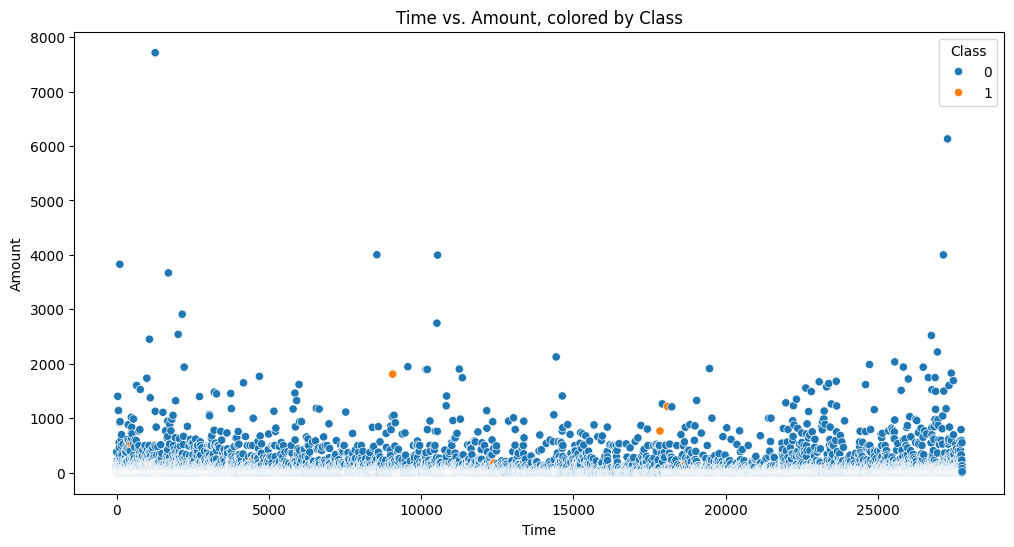

In [7]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df_viz)
plt.title('Time vs. Amount, colored by Class')
plt.show()


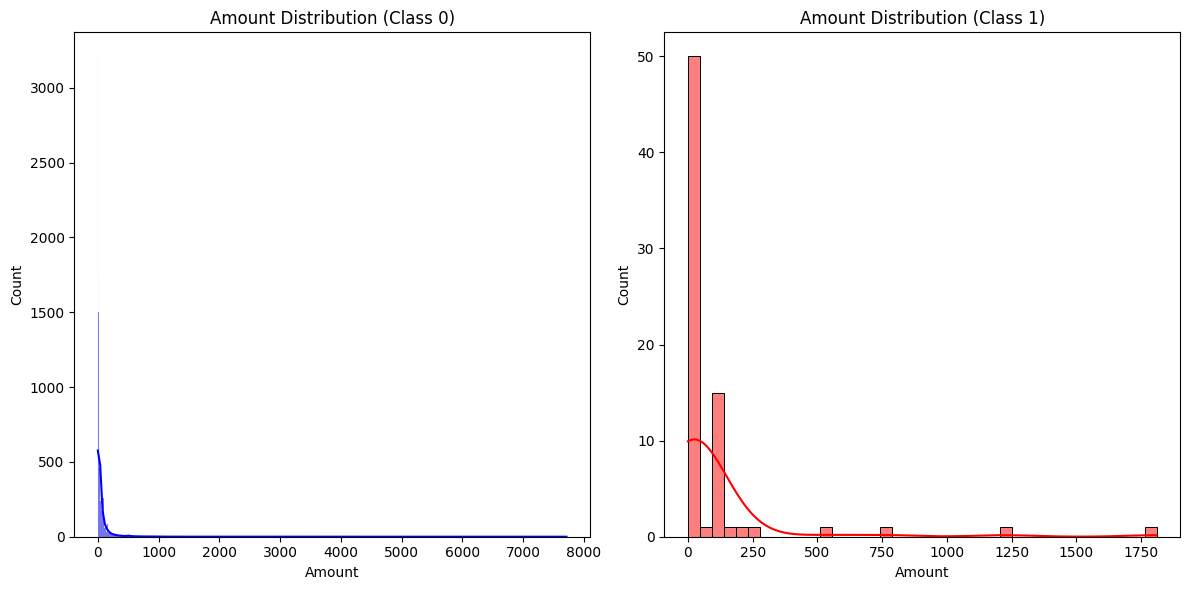

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_viz[df_viz['Class'] == 0]['Amount'], color='blue', kde=True)
plt.title('Amount Distribution (Class 0)')
plt.subplot(1, 2, 2)
sns.histplot(df_viz[df_viz['Class'] == 1]['Amount'], color='red', kde=True)
plt.title('Amount Distribution (Class 1)')
plt.tight_layout()
plt.show()

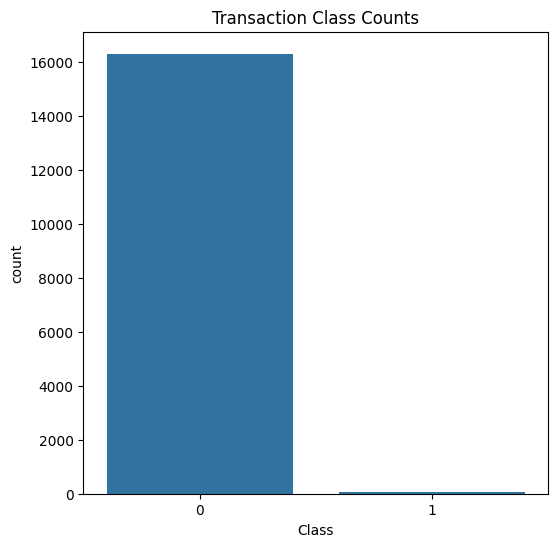

In [9]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Class', data=df_viz)
plt.title('Transaction Class Counts')
plt.show()

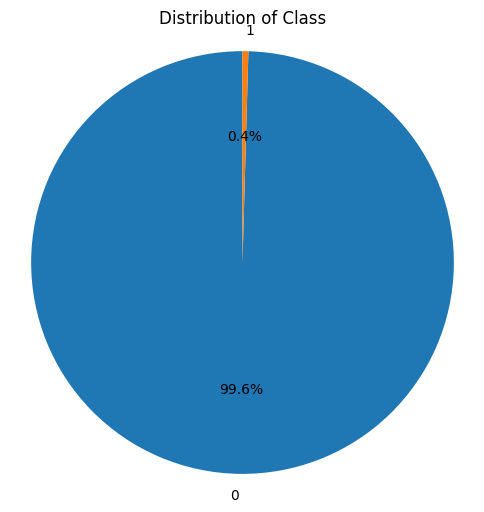

In [12]:
df = pd.read_excel('fraud dataset.xls')  # Assuming 'fraud dataset.xls' is your file
pie_chart_column = 'Class'
class_counts = df[pie_chart_column].value_counts()
labels = class_counts.index.tolist()
sizes = class_counts.values.tolist()

plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of {}'.format(pie_chart_column))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load the data:
df = pd.read_excel('fraud dataset.xls')

# 2. Prepare the data:
# Separate features (X) and target (y)
X = df.drop('Class', axis=1)  # Features (all columns except 'Class')
y = df['Class']  # Target variable ('Class')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the model:
nb_model = GaussianNB()  # Create a Gaussian Naive Bayes model
nb_model.fit(X_train, y_train)  # Train the model on the training data

# 4. Make predictions:
y_pred = nb_model.predict(X_test)  # Predict on the testing data

# 5. Evaluate the model:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 6. Print the results:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.9829111992676228

Confusion Matrix:
 [[3209   55]
 [   1   12]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3264
           1       0.18      0.92      0.30        13

    accuracy                           0.98      3277
   macro avg       0.59      0.95      0.65      3277
weighted avg       1.00      0.98      0.99      3277



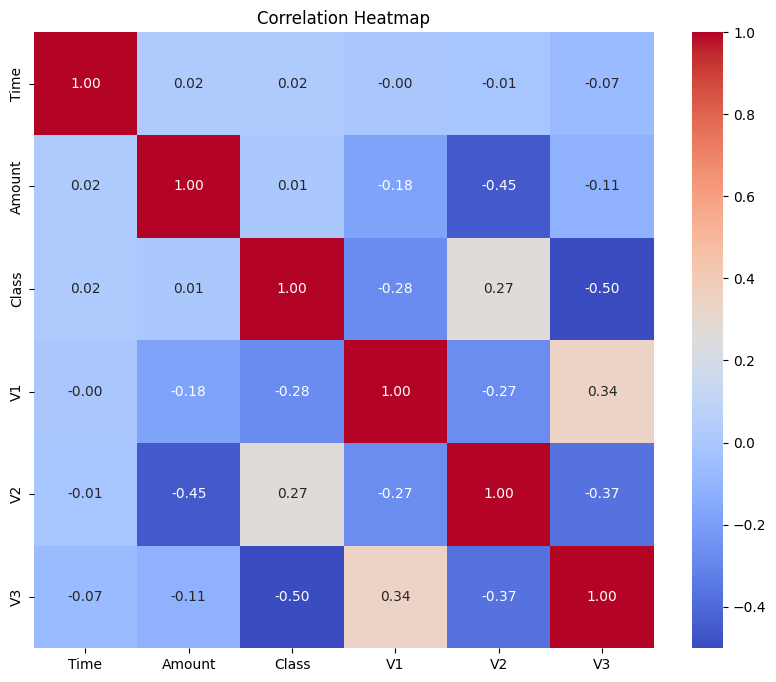

In [30]:
# 4. Create the heatmap:
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

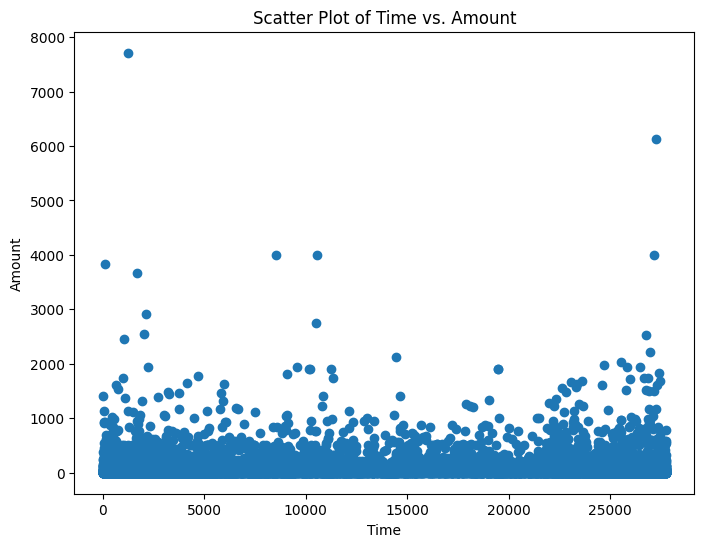

In [21]:
x_column = 'Time'
y_column = 'Amount'

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(df[x_column], df[y_column])
plt.title('Scatter Plot of {} vs. {}'.format(x_column, y_column))
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

## Summary:

### 1. Q&A
How can I create a plot in Colab?

The provided solution demonstrates how to create plots in Colab using the `matplotlib.pyplot` and `seaborn` libraries.  Three plots were generated: a scatter plot of 'Time' vs. 'Amount' colored by 'Class', two histograms of 'Amount' for each class, and a count plot showing the number of transactions in each class.

### 2. Data Analysis Key Findings
* The dataset exhibits a significant class imbalance: 16,310 non-fraudulent transactions (Class 0) and only 73 fraudulent transactions (Class 1).
*  The scatter plot of 'Time' vs. 'Amount' colored by 'Class' allows for visual inspection of potential correlations between transaction time, amount, and fraudulence.
* The histograms of transaction amounts reveal differences in the distribution of transaction values between the fraudulent (Class 1) and non-fraudulent (Class 0) transactions.


### 3. Insights or Next Steps
* Investigate the observed differences in amount distributions between fraudulent and non-fraudulent transactions further.  Statistical tests could be performed to assess the significance of these differences.
* Explore other features in the dataset beyond 'Time' and 'Amount' to identify additional patterns or predictors of fraudulent transactions.
